# Sampling

## Rejection Sampling

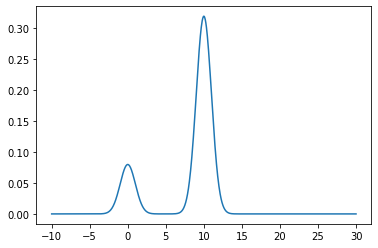

In [1]:
# Gaussian distribution 정의 및 target distribution 구성.

"""
    Target Distribution : 0.2 * normal(0, 1) + 0.8 * normal(10, 1)
"""

import math
import numpy as np
import matplotlib.pyplot as plt


def gaussian_pdf(x, mean, std):
    return (1/(std*np.sqrt(2*math.pi))) * np.exp((-(x-mean)**2)/(2*std**2))


def target_distribution(x, means=[0, 10], stds=[1, 1]):
    a = 0.2
    b = 0.8
    mean1, mean2 = means
    std1, std2 = stds
    return a*gaussian_pdf(x, mean1, std1) + b*gaussian_pdf(x, mean2, std2)

xs = np.linspace(-10, 30, 1000)
plt.plot(xs, target_distribution(xs))

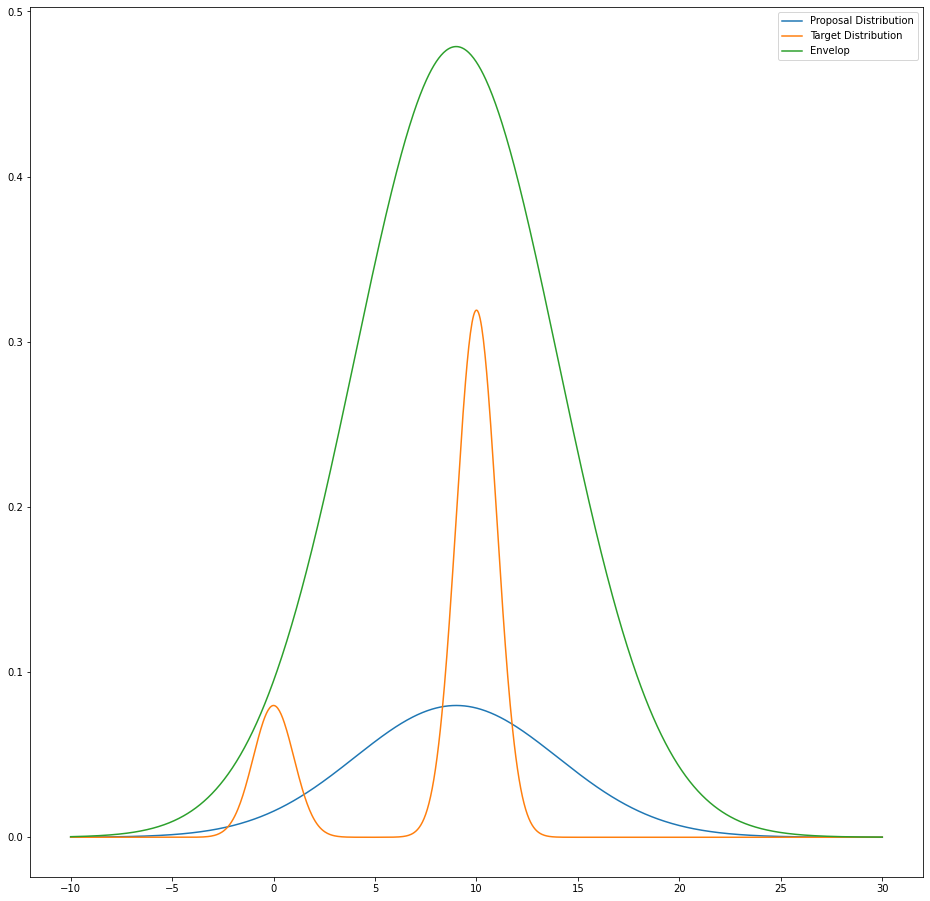

In [2]:
"""
    proposal distribution : Normal(9, 5) * M
"""

x = np.linspace(-10, 30, 1000)
proposal = gaussian_pdf(x, 9., 5)
M = 6
plt.figure(figsize=(16,16))
plt.plot(xs, proposal, label='Proposal Distribution')
plt.plot(xs, target_distribution(xs), label='Target Distribution')
plt.plot(xs, proposal*M, label='Envelop') # 감싸는 M 조정.
plt.legend()
plt.show()

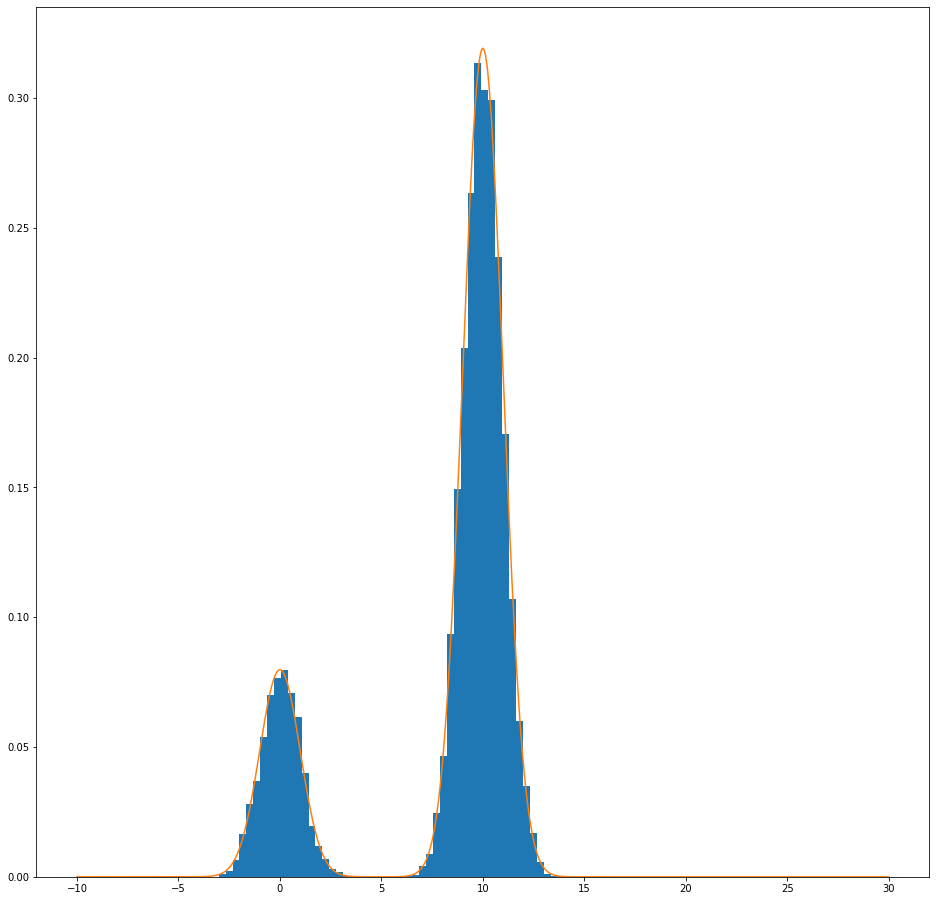

In [3]:
# Rejection
N = 10000
M = 6
count = 0
accpts = []
while count < N:
    prop_sample = np.random.normal(9, 5, 1)[0] # random한 x들.
    coin = np.random.random(1)[0]
    
    coin_toss = coin < target_distribution(prop_sample)/(M*gaussian_pdf(prop_sample, 9., 5))

    if coin_toss :
        count += 1
        accpts.append(prop_sample)

plt.figure(figsize=(16,16))
xs = np.linspace(-10, 30, 1000)
plt.hist(accpts, bins=50, density=True) # 제대로 샘플링.
plt.plot(xs, target_distribution(xs)) 

## Metropolis Hasting

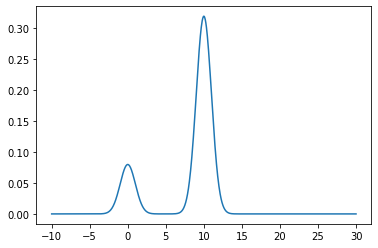

In [4]:
# Gaussian distribution 정의 및 target distribution 구성.

"""
    Target Distribution : 0.2 * normal(0, 1) + 0.8 * normal(10, 1)
"""

import math
import numpy as np
import matplotlib.pyplot as plt


def gaussian_pdf(x, mean, std):
    return (1/(std*np.sqrt(2*math.pi))) * np.exp((-(x-mean)**2)/(2*std**2))


def target_distribution(x, means=[0, 10], stds=[1, 1]):
    a = 0.2
    b = 0.8
    mean1, mean2 = means
    std1, std2 = stds
    return a*gaussian_pdf(x, mean1, std1) + b*gaussian_pdf(x, mean2, std2)

xs = np.linspace(-10, 30, 1000)
plt.plot(xs, target_distribution(xs))

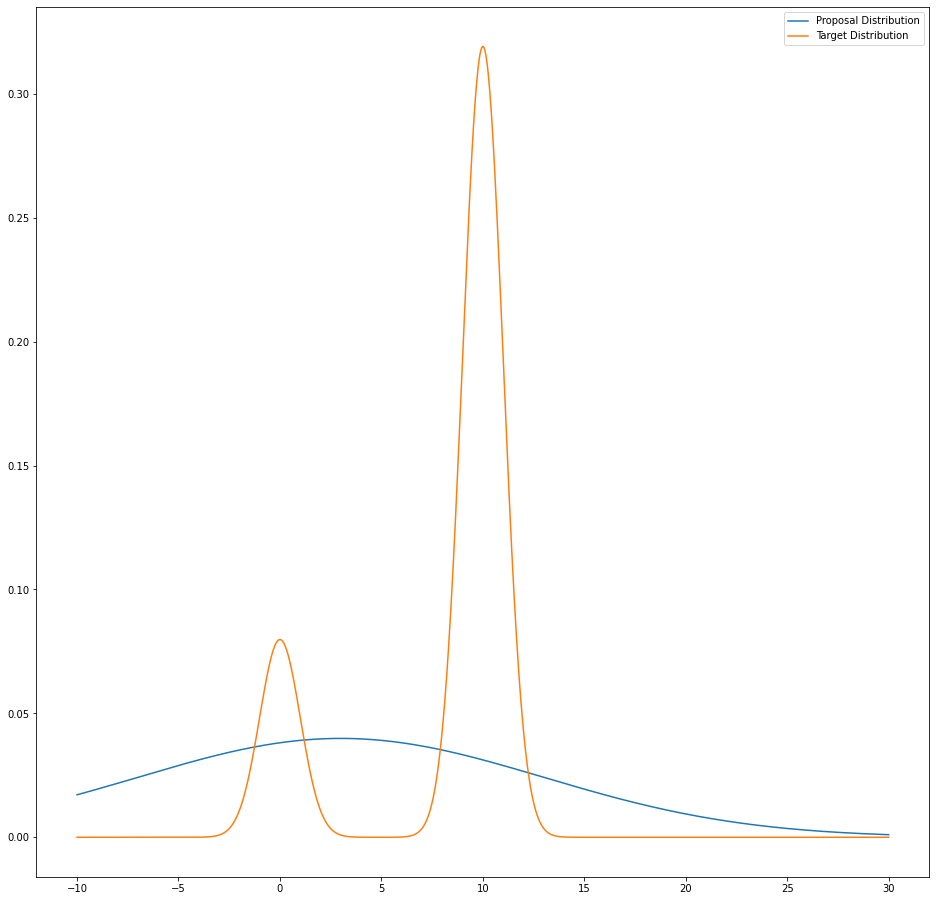

In [13]:
"""
    proposal distribution : Normal(9, 5) * M
"""

x = np.linspace(-10, 30, 1000)
proposal = gaussian_pdf(x, 3, 10) # transition matrix
plt.figure(figsize=(16,16))
plt.plot(xs, proposal, label='Proposal Distribution')
plt.plot(xs, target_distribution(xs), label="Target Distribution")
plt.legend()
plt.show()

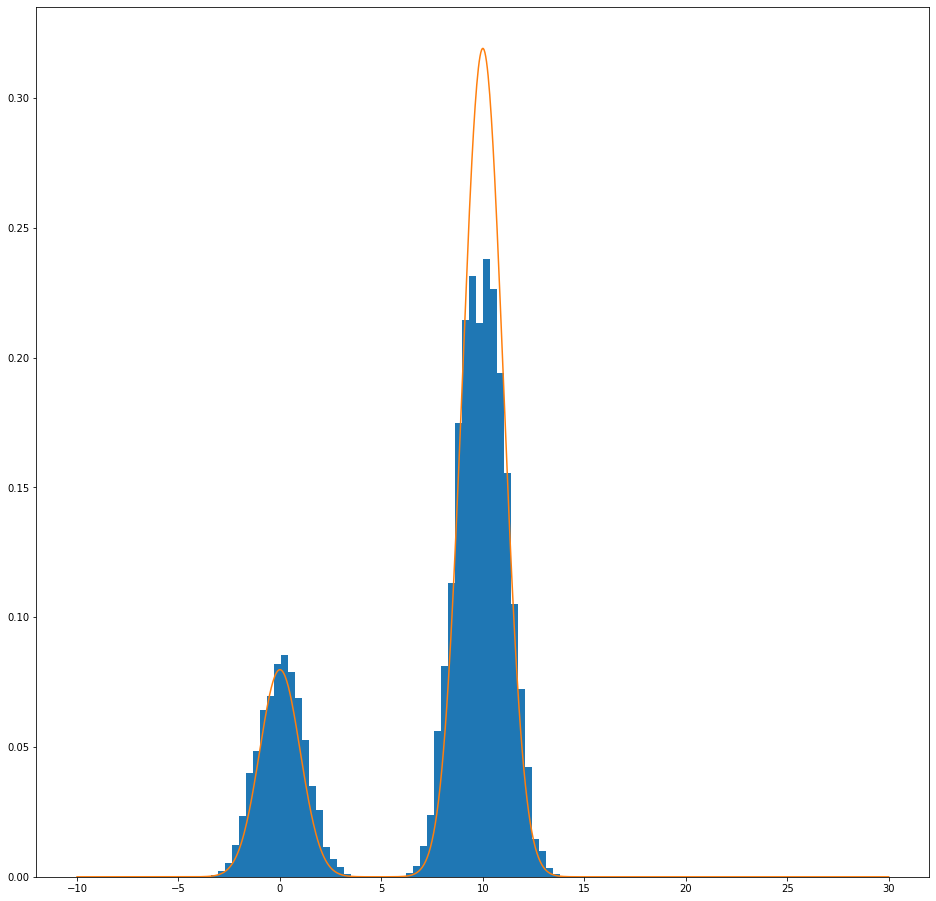

In [14]:

def acceptance_ratio(x_prev, candidate, std=6):

    ratio = (gaussian_pdf(x_prev, candidate, std) * target_distribution(candidate)) / (gaussian_pdf(candidate, x_prev, std) * target_distribution(x_prev))
    return min(1, ratio)




N = 10000
count = 0
accpts = []
prev_x = np.random.normal(3, 6, 1)
while count < N:
    candidate = np.random.normal(prev_x, 6, 1)[0] # random한 x들.
    acceptance = acceptance_ratio(prev_x, candidate)
    coin = np.random.random(1)[0]
    
    coin_toss = coin < acceptance

    if coin_toss :
        count += 1
        accpts.append(candidate)
        prev_x = candidate

xs = np.linspace(-10, 30, 1000)
plt.figure(figsize=(16,16))
plt.hist(accpts, bins=50, density=True) # 제대로 샘플링.
plt.plot(xs, target_distribution(xs)) 
plt.show()